In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

def present(directory):
    final_dists = []
    boxes = []
    boxes_x = []
    trials_boxes_x = []
    references = []
    best_archive_gaits_performances = []
    num_trials_per_damage = []
    
    dmgid = 0
    box_counter = 0
    
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        best_archive_gaits = np.loadtxt(directory + "/iteresults/" + dmgdir + "/max_archive_gaits.txt")
        best_archive_gaits_performances.append(best_archive_gaits)
    
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        boxes_x.append(dmgdir)
        boxes_x.append("")
        trials_boxes_x.append(dmgdir)
        dmgid += 1
        num_trials = []
        final_dists = []
        for subdir in os.listdir(directory + "/iteresults/" + dmgdir):
            
            if subdir != "ref.txt" and subdir != "max_archive_gaits.txt":
                x = np.loadtxt(directory + "/iteresults/" + dmgdir + "/" + subdir + "/observations.dat")
                if x.ndim == 1:
                    best_score = x[1]
                else:
                    best_score = x[len(x)-1][1]
                final_dists.append(best_score)
                num_trials.append(len(x))
                
        
        boxes.append(final_dists) 
        boxes.append(best_archive_gaits_performances[box_counter]) # append the best archive sol. performance for comparison 
        box_counter += 1
        
        num_trials_per_damage.append(num_trials)
        
        ref = np.loadtxt(directory + "/iteresults/" + dmgdir + "/ref.txt")
        references.append(ref)
        
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes[0:18])
    axes.set_ylim([0,10])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
    
    ref_count = 0
    for i in range(9):
        for j in range(len(references[i])):
            if i == 0:
                axes.plot(i+1+ref_count, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1+ref_count, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
        ref_count += 1
        
    # ticks = np.linspace(1, len(boxes), len(boxes))
    ticks = np.linspace(1, 18, 18)
    plt.ylabel("Max covered meters in 5s", fontsize = 18)
    plt.xticks(ticks, boxes_x)
    plt.xlabel("Experiment", fontsize = 18)
    plt.title("ITE damage recovery results", fontsize = 20)
    plt.grid(axis='y')
    # plt.axvline(x=18.5, color='k', linestyle='-')
    
    i = 2.5
    while i < 30:
        plt.axvline(x=i, color='k', linestyle='--', linewidth = 0.5)
        i+=2
    plt.legend()
    
    titles = ["No\ndamage", "Middle\nleg\nremoval", "Left\nhind\nremoval","Right\nfront\nremoval","M. right\nh.left\nremoval", "Hind\nright\nremoval", "Middle\nleft\nstuck", "Spring\nstiffness\nreduction","Removed\nmiddle\nlegs"]
    for i in range(len(titles)):
        if i >= 7:
            plt.text(i*2 + 0.8, 7.8, titles[i], fontsize=12, bbox=dict(facecolor='w'))
        else:
            plt.text(i*2 + 0.8, 9, titles[i], fontsize=12, bbox=dict(facecolor='w'))
    
    plt.savefig(directory + "/plots/dmgmaxscore.png")
    plt.show()
        
        
    # plot environment boxplots
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes[18:36])
    axes.set_ylim([0,10])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
    
    ref_count = 0
    for i in range(9,18):
        for j in range(len(references[i])):
            if i == 0 or i == 9:
                axes.plot(i+1+ref_count-9, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1+ref_count-9, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
        ref_count += 1
        
    # ticks = np.linspace(1, len(boxes), len(boxes))
    ticks = np.linspace(1, 18, 18)
    plt.ylabel("Max covered meters in 5s", fontsize = 18)
    plt.xticks(ticks, boxes_x[18:])
    plt.xlabel("Experiment", fontsize = 18)
    plt.title("ITE environment recovery results", fontsize = 20)
    plt.grid(axis='y')
    # plt.axvline(x=18.5, color='k', linestyle='-')
    
    i = 2.5
    while i < 30:
        plt.axvline(x=i, color='k', linestyle='--', linewidth = 0.5)
        i+=2
    plt.legend()
    
    titles = ["Bumpy\nenviron-\nment", "Stairs", "Sand\ndune","Angled\nincline","Pipes", "Rugged\nditch", "Ditch", "Thick\npipe","Thin\npipe"]
    for i in range(len(titles)):
        if i >= 7:
            plt.text(i*2 + 1, 7, titles[i], fontsize=12, bbox=dict(facecolor='w'))
        else:
            plt.text(i*2 + 1, 9, titles[i], fontsize=12, bbox=dict(facecolor='w'))
   
    plt.savefig(directory + "/plots/envmaxscore.png")
    
    plt.show()
        
        
    ticks = np.linspace(1, len(best_archive_gaits_performances), len(best_archive_gaits_performances))
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(num_trials_per_damage)
    plt.ylabel("No. trials to recovery", fontsize = 18)
    plt.xlabel("Experiment", fontsize = 18)
    plt.xticks(ticks, trials_boxes_x)
    plt.grid(axis='y')
    plt.axvline(x=9.5, color='k', linestyle='-')
    plt.title("ITE trials before recovery", fontsize = 20)
    plt.savefig(directory + "/plots/avgtrials.png")
    plt.show()
    
    print(len(boxes))
    recovery = []
    for i in range(len(boxes) - 1):
        if i % 2 == 0:
            recovered = np.mean(boxes[i])
            original = np.mean(boxes[i + 1])
            x = 1 - (original / recovered)
            recovery.append(x)
    print(recovery)
    print(str(np.mean(recovery)) + " overall")
    
    numdamage = 9
    numenv = 6
    
    print(np.mean(recovery[0:numdamage]))
    print(np.mean(recovery[numdamage:]))

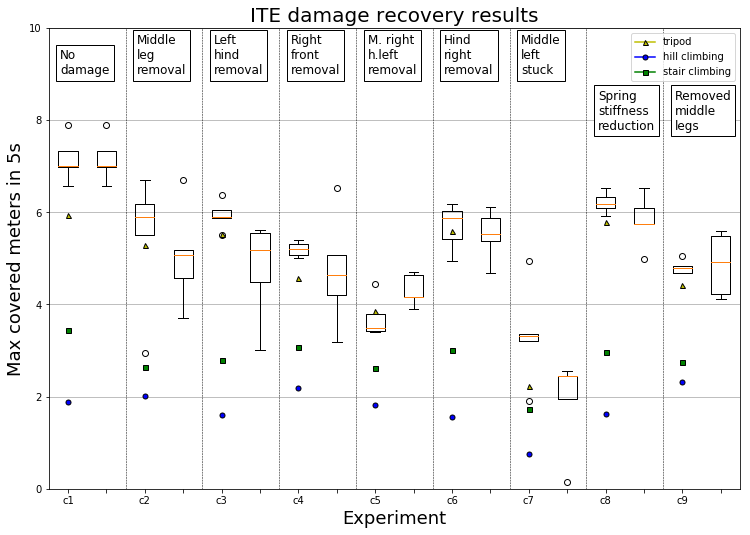

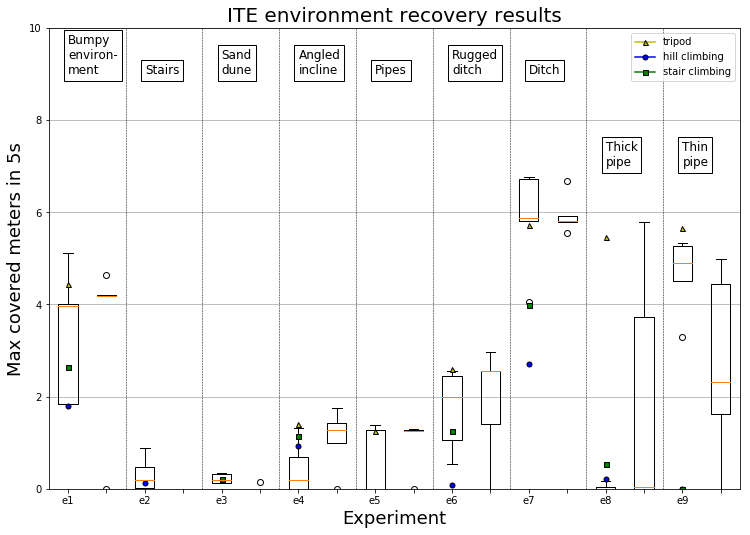

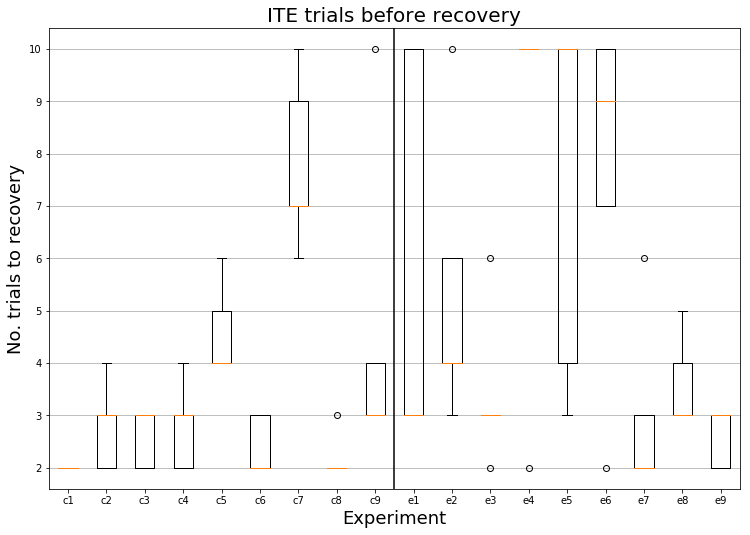

36
[2.220446049250313e-16, 0.07318339405465035, 0.19770398029713177, 0.09249767205458181, -0.1622746694342978, 0.03073552612623376, 0.4288990225287548, 0.0626775598490017, -0.012754862214042983, 1.001721797673883, 1.0, 1.0000143219630646, 1.0005452173964582, 1.0001695023730803, -0.10728625787541035, -0.01738556292832394, 1.0003179721004931, 0.4248922301329574]
0.38964760244990093 overall
0.07896306925133484
0.700332135648467


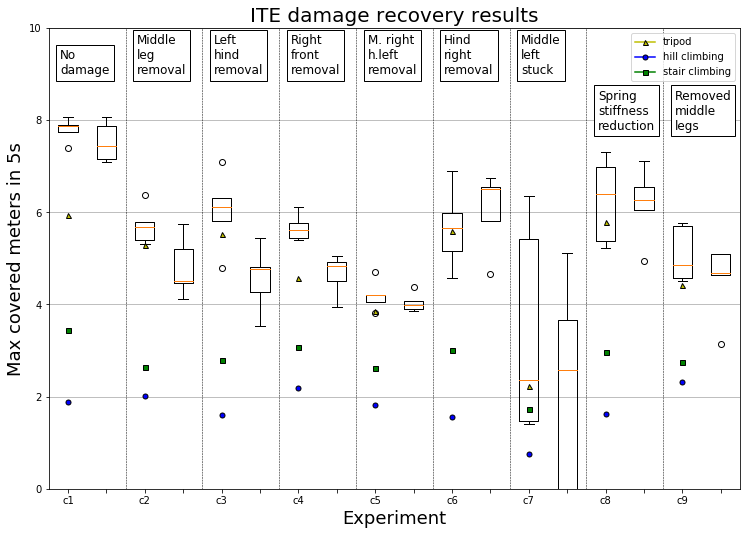

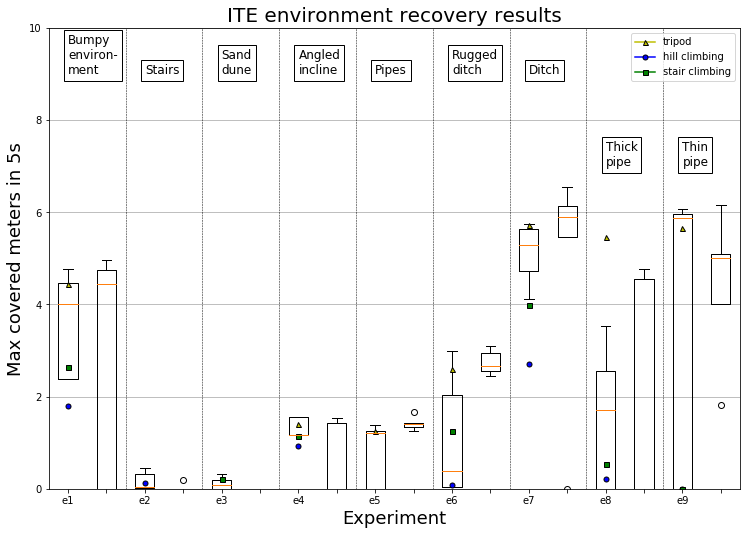

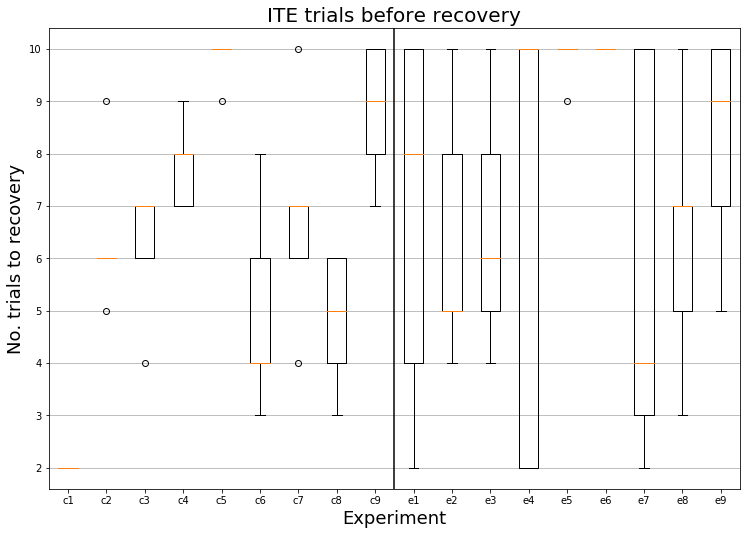

36
[0.03450422405396292, 0.15760653199452523, 0.24178653134270467, 0.17930180414598973, 0.036392061803616316, -0.07022606478418991, 0.33336250579288695, 0.011213192878933742, 0.1075964276203939, 1.0014182777126823, 1.000019661876285, 1.0, 0.44224571676873914, 1.0003545825150857, 1.0013732270345233, 0.05839856168738611, 1.0004663221103969, -0.23403159116290162]
0.40565455407727885 overall
0.11461524609431373
0.6966938620602441


In [19]:
# present("dc2307")
#/home/aran/itev2/map_stats/dcf0608/iteresults
#present("dcf0608")
present("dcf0608crit")
#present("bo0208")
present("bo0208crit")